# Using ANNs 

Part 0 : Importing Libraries

In [64]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [66]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Part 1 : Working on the Dataset 

In [114]:
# Link to the Dataset: https://drive.google.com/file/d/1ZRXIpzLhbtBccjauzROH5AuY3aZl7faW/view
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
# Getting Independant and Dependant Features
X = dataset.iloc[: , 3 : 13]
y = dataset.iloc[: , 13]

In [69]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [70]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [71]:
# Feature Engineering - One Hot Encoding Values... And then removing the first Column (Remaining all = 0 : First Column)
geography = pd.get_dummies(X['Geography'] , drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first = True)

In [72]:
# Dropping previous categorical variables
X = X.drop(['Geography' , 'Gender'] , axis = 1)

In [73]:
# Concatenate these Variables in the Dataframe
X = pd.concat([X , geography , gender] , axis = 1)

In [74]:
# Splitting into Training and Testing Datasets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0);

In [75]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Learn Why: Why is fit_transform applied to training dataset and why is transform applied to testing dataset
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# HINT: Data Leakage

Part 2 : Working on ANN

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU , ELU , PReLU , LeakyReLU
from tensorflow.keras.layers import Dropout

In [77]:
# Initializing ANN
classifier = Sequential();

In [78]:
# Adding the Input Layer
classifier.add(Dense(units = 11 , activation = 'relu'))

In [99]:
# Adding the First Hidden Layer
classifier.add(Dense(units = 7 , activation = 'relu'))

# Adding a Dropout Layer
classifier.add(Dropout(0.2))

In [100]:
# Adding the Second Hidden Layer
classifier.add(Dense(units = 6 , activation = 'relu'))

# Adding a Dropout Layer
classifier.add(Dropout(0.3))

In [101]:
# Adding the Output Layer
classifier.add(Dense(units = 1 , activation = 'sigmoid'))

In [102]:
# OPTIONAL: Adding your own Adam Optimizer with the Learning Rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [103]:
# Compiling all the layers
classifier.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [104]:
# Stop training when a monitored metric has stopped improving
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [105]:
# Fitting the Training Data in the Model
model_history = classifier.fit(X_train , y_train , validation_split = 0.33 , batch_size = 10 , epochs = 1000 , callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4842 - accuracy: 0.7955 - val_loss: 0.4327 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4531 - accuracy: 0.7962 - val_loss: 0.4328 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4517 - accuracy: 0.7962 - val_loss: 0.4297 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4597 - accuracy: 0.7962 - val_loss: 0.4383 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4526 - accuracy: 0.7962 - val_loss: 0.4359 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4481 - accuracy: 0.7962 - val_loss: 0.4290 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4481 - accuracy: 0.7962 - val_loss: 0.4258 - val_accuracy:

In [106]:
# See Model History - Params we have focused on 
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

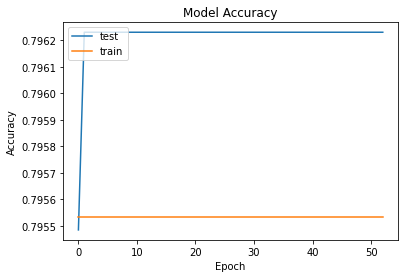

In [107]:
# Plotting Accuracy vs Epochs
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['test' , 'train'] , loc = 'upper left')
plt.show()

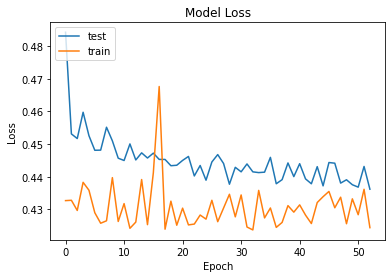

In [108]:
# Plotting Loss vs Epochs
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['test' , 'train'] , loc = 'upper left')
plt.show()

Part 3 : Predicting Values

In [109]:
# Predicting the Prediction Values
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [110]:
# Creating the Confusing Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [111]:
# Checking the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , y_pred)
score

0.7975

Additional

In [112]:
# Getting the Weights used by all the ANNs
classifier.get_weights()

[array([[-0.52932143,  1.3731264 , -0.6634584 ,  1.6132388 ,  1.1967402 ,
         -0.2967414 , -1.063155  , -1.7594886 , -1.5252311 ,  0.21432517,
         -0.35355338],
        [ 4.6928344 , -2.1556778 ,  1.7341331 , -2.895516  , -1.3614489 ,
          2.2875621 ,  0.3018374 , -1.848585  , -0.4190043 ,  1.2790424 ,
          4.282817  ],
        [ 0.10506574,  2.952593  ,  0.08916236,  2.1001947 ,  0.2066176 ,
         -0.5517235 , -1.5427558 ,  0.400085  ,  0.07250667,  0.34651494,
          0.41548812],
        [-4.2798495 , -2.1434429 ,  4.1696153 , -0.44247407, -2.7275167 ,
         -0.78712016, -2.2543402 ,  1.1376976 , -2.5936823 ,  1.5974787 ,
          0.33819714],
        [-3.8283997 , -0.7086408 , -1.7788116 , -0.76432204,  4.871255  ,
          0.68155974, -1.5975673 ,  1.4848636 , -0.8916942 , -1.2803587 ,
          6.675936  ],
        [-0.7000011 , -1.6269448 , -1.3506212 ,  0.5082271 ,  0.3607864 ,
          0.23903418, -0.54636574, -0.6492557 ,  0.39177084,  2.0201805